In [20]:
import pandas as pd
import numpy as np

In [21]:
sal = pd.read_csv('Salaries.csv')
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [22]:
sal.shape

(148654, 13)

In [23]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [24]:
### is missing value ?
sal.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

## statistics 

In [25]:
### mean?

sal['TotalPayBenefits'].mean()

93692.55481056834

In [26]:
## median?
sal['TotalPayBenefits'].median()

92404.09

In [27]:
## mode?
sal['TotalPayBenefits'].mode()[0]##

7959.18

In [28]:
sal.describe()## only continuous variable

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


## percentile

In [29]:
percentile_25 = np.percentile(sal['TotalPayBenefits'], 25)
percentile_25

44065.65

In [30]:
percentile_75 = np.percentile(sal['TotalPayBenefits'], 75)
percentile_75

132876.45

## Practice 
    a) 97th 
    b) 95th percentile for column TotalPayBenefits

In [40]:
np.percentile(sal['TotalPayBenefits'] , 97)

222393.0593

In [41]:
np.percentile(sal['TotalPayBenefits'] , 95)

203566.9545

## Outliers
        1) How to detect
        2) How to handle

C:\Users\roopagupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


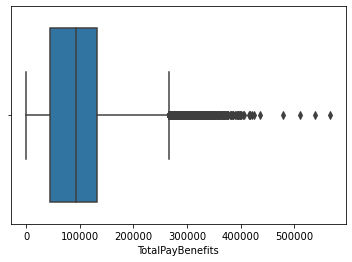

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(sal['TotalPayBenefits'])
plt.show()

## How to hadle outliers 
        1) Remove
        2) Impute
        
        Lower Cap = Q1 - 1.5(Q3-Q1)
        Upper Cap = Q3 + 1.5(Q3-Q1)

In [32]:
q1 = np.percentile(sal['TotalPayBenefits'] , 25)
q3 = np.percentile(sal['TotalPayBenefits'], 75)
print("25 th ans 75th percentile" , q3 , q1)

IQR = (q3-q1)

LC = q1 - 1.5*(q3-q1)
UC = q3 + 1.5*(q3-q1)

print("LC and UC" , LC, UC)

25 th ans 75th percentile 132876.45 44065.65
LC and UC -89150.55000000002 266092.65


In [ ]:
sal[]

In [33]:
sal_new = sal[~((sal['TotalPayBenefits']<LC) | (sal['TotalPayBenefits']> UC))]

In [34]:
sal.shape

(148654, 13)

In [35]:
sal_new.shape

(147721, 13)

C:\Users\roopagupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


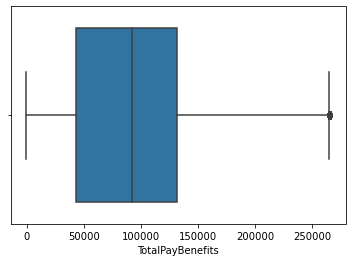

In [36]:
sns.boxplot(sal_new['TotalPayBenefits'])
plt.show()

#### How to impute outliers: 
        replace all values which is less than LC with LC
        replace all values which is greater than UC with UC

In [42]:
sal[sal['TotalPayBenefits']< LC] = LC
sal[sal['TotalPayBenefits'] > UC] = UC

C:\Users\roopagupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalPayBenefits'>

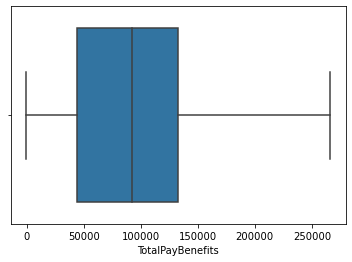

In [43]:
sns.boxplot(sal['TotalPayBenefits'])

## Variance and Standard deviation

In [46]:
np.std(sal['TotalPayBenefits'])

62147.25237035886

In [48]:
np.var(sal['TotalPayBenefits'])

3862280977.185075

In [49]:
sal.corr()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
Id,1.000000,-0.067341,0.259250,0.280291,0.181275,-0.098105,-0.014403,0.333321,NaN,NaN
BasePay,-0.067341,1.000000,0.430498,0.424223,0.804062,0.960621,0.942276,0.356505,NaN,NaN
OvertimePay,0.259250,0.430498,1.000000,0.886828,0.821253,0.481969,0.401644,0.888989,NaN,NaN
OtherPay,0.280291,0.424223,0.886828,1.000000,0.824186,0.428621,0.342923,0.941918,NaN,NaN
Benefits,0.181275,0.804062,0.821253,0.824186,1.000000,0.749581,0.707745,0.822891,NaN,NaN
TotalPay,-0.098105,0.960621,0.481969,0.428621,0.749581,1.000000,0.974356,0.298143,NaN,NaN
TotalPayBenefits,-0.014403,0.942276,0.401644,0.342923,0.707745,0.974356,1.000000,0.220719,NaN,NaN
Year,0.333321,0.356505,0.888989,0.941918,0.822891,0.298143,0.220719,1.000000,NaN,NaN
Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# z-score (x-mean)/SD

z_score = (sal['TotalPayBenefits'] - (np.mean(sal['TotalPayBenefits'])) )/np.std(sal['TotalPayBenefits'])

z_score

0         2.777188
1         2.777188
2         2.777188
3         2.777188
4         2.777188
            ...   
148649   -1.504460
148650   -1.504460
148651   -1.504460
148652   -1.504460
148653   -1.514406
Name: TotalPayBenefits, Length: 148654, dtype: float64